# Coefficients of the profle caused by Dislocations


Following Gubicza ... we define the variable 
$$
\kappa = \frac{2\sin \theta}{\lambda},
$$

where $\theta$ is the scattering angle, $\lambda$ is the X-ray wavelength. The Fourier transform of a peak profile for a dislocated crystal is given by
$$
A_D(L) = e^{-\frac{\pi}{2}\rho b^2 L^2 f(\eta) g_{hkl}^2 \bar{C}_{hkl}},$$
 
where the variable $L$ is related to $\kappa$ through the Fourier-transform

$$
I(\kappa) = \int_{-\infty}^\infty A_D(L)e^{2\pi i\kappa L }dL.
$$

The dislocation density is $\rho$, $b$ is the length of the Burgers-vector and $g_{hkl}$ corresponds to the Bragg position. The average contrast factor is computed as 

$$
\bar{C}_{hkl} = C_{h00} \left( 1 - q \frac{h^2k^2 + k^2 l^2 + h^2 l^2}{h^2 +k^2 +l^2}\right),
$$

for some $C_{h00}$ and $q$ depends on the elastic properties of the material and the type of dislocations considered. The coefficient $f(\eta)$ is referred to as the Wilkens-function, and depends on the variable 
$$
\eta = \frac{1}{2}e^{-0.25}\frac{L}{R^*},
$$
where $R^*$ is a cutoff-distance for the effects of the dislocations. The Wilkens-function is defined piecewise and can be evaluated as
$$
\text{for }\eta<1, f(\eta) = -\log \eta + \left(\frac{7}{4} -\log 2\right) + \frac{512}{90\pi}\frac{1}{\eta}+\frac{2}{\pi}\left(1-\frac{1}{4\eta^2}\right) \int_0^\eta \frac{\text{arcsin} x}{x}dx - \frac{1}{\pi}\left(\frac{769}{180}\frac{1}{\eta}+\frac{41}{90}\eta + \frac{2}{90}\eta^3\right)\sqrt{1-\eta^2}+\frac{1}{\pi}\left(\frac{11}{12}\frac{1}{\eta^2}+\frac{7}{2}+\frac{1}{3}\eta^2\right)\text{arcsin } \eta + \frac{\eta^2}{6}
$$

$$
\text{for }\eta\geq1, f(\eta) = \frac{512}{90 \pi}\frac{1}{\eta} - \left(\frac{11}{24} + \frac{11}{24}\log 2\eta \right) \frac{1}{\eta^2}
$$

Although the integral in $f(\eta)$ can be computed in closed form using the polylogarithm, we found that a simple quintic approximation to the integral in the domain $\eta\in[0,1]$ was sufficiently accurate and considerably faster. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq, fft, ifft, ifftshift, fftshift
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 15})
rc('text', usetex=True)

In [2]:
import matplotlib

In [3]:
%load_ext autoreload
%autoreload 2
%aimport  cmwp_profiles

In [4]:
from cmwp_profiles.peak_shapes import Peak, generate_multiple_peaks


In [5]:
N = 1024 * 8 


Here we initialize a Peak object

with the following properties:

$$a =0.36, b =0.255, C_{h00}=0.1. $$


The computational domain will correspond to $\kappa \in [0, \kappa_{max}]$ with $\kappa_{max}=14$. 

In [6]:
lattice_constant = 0.36



## Effect of the parameters of the dislocation profile

The parameters $\rho^*$, $R^*$ and $q$ can change for a given peak. The Bragg position is assumed to be at

$g = h^2 + k^2 + l^2$


In [7]:
h, k, l = 1, 1, 1

single_peak = Peak(14, N, 0.1, 0.255, lattice_constant, stacking_or_twin_fault='stacking')
lengthOfFrame = 2 * single_peak.max_range_diffraction_vector
L = single_peak.math.fftfreq(single_peak.Nfourier, 
                                            lengthOfFrame / single_peak.Nfourier).reshape(-1, 1) + 1e-16
N = len(L)
dell = L[1,:] - L[0,:]
factor = dell * N # normalization factor for the Fourier transform


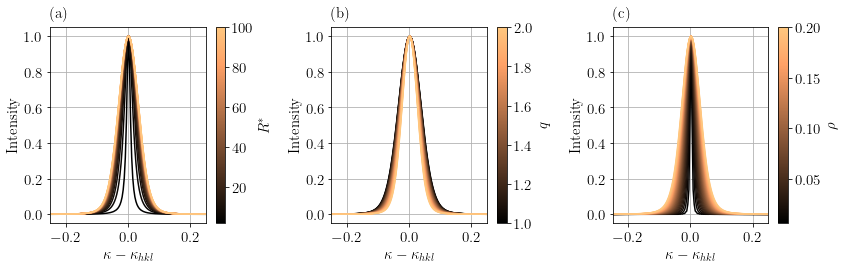

In [23]:
norm = matplotlib.colors.Normalize(
    vmin=2,
    vmax=100)

colormap = matplotlib.cm.copper

rstars = np.linspace(2, 100, 30)
g = h**2 + k**2 + l**2
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
norm = matplotlib.colors.Normalize(
    vmin=rstars.min(),
    vmax=rstars.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for r in rstars:
    
    ft_dislocation = single_peak.fourier_coefficients_dislocation(np.abs(L),
                                                      0.10078875, 
                                                          r, 
                                                          h, k, l, g, 
                                                         1.4)
    profile = np.abs(ifftshift( ifft ( ft_dislocation, axis = 0), axes =0)) * factor
    max_value = np.max(profile)
    axes[0].plot(single_peak.diffraction_vectors, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(r))#
plt.colorbar(scalar_mappable_colormap, ax = axes[0], label = '$R^*$')

    
##
qs = np.linspace(1, 2, 30)

norm = matplotlib.colors.Normalize(
    vmin = qs.min(),
    vmax = qs.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for q in qs:
    
    ft_dislocation = single_peak.fourier_coefficients_dislocation(np.abs(L),
                                                      0.10078875, 
                                                          100, 
                                                          1,1,1, g, 
                                                         q)
    profile = np.abs(ifftshift( ifft ( ft_dislocation, axis =0), axes = 0)) * factor
    max_value = np.max(profile)
    axes[1].plot(single_peak.diffraction_vectors, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(q))#
axes[0].set_xlim(-1, 1)
axes[1].set_xlim(-0.5, 0.5)
plt.colorbar(scalar_mappable_colormap, ax = axes[1], label = '$q$')




rhos = np.linspace(0.006,0.2, 30)

norm = matplotlib.colors.Normalize(
    vmin = rhos.min(),
    vmax = rhos.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for r in rhos:
    
    ft_dislocation = single_peak.fourier_coefficients_dislocation(np.abs(L),
                                                      r, 
                                                          30, 
                                                          h, k, l, g, 
                                                         2)
    profile = np.abs(ifftshift( ifft ( ft_dislocation, axis =0 ), axes =0)) * factor
    max_value = np.max(profile)
    axes[2].plot(single_peak.diffraction_vectors, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(r))#
axes[0].set_xlim(-1, 1)
axes[1].set_xlim(-0.5, 0.5)
axes[2].set_xlim(-0.5, 0.5)

plt.colorbar(scalar_mappable_colormap, ax = axes[2], label = '$\\rho$')
for a in axes:
    a.grid()
    a.set_ylabel('Intensity')
    a.set_xlabel('$\kappa-\kappa_{hkl}$')
    a.set_xlim(-0.25, 0.25)

axes[0].text(0, 1.05, '(a)', transform=axes[0].transAxes)
axes[1].text(0, 1.05, '(b)', transform=axes[1].transAxes)
axes[2].text(0, 1.05, '(c)', transform=axes[2].transAxes)

#axes[1].set_title('Varying $q$')
#axes[2].set_title('Varying $\\rho$')

fig.tight_layout()
plt.savefig('Dislocation.pdf', bbox_inches='tight')

## Approximation of the integral

Here we compare the various approximations for the arcsin$ \ x/x$ integral. In the ```numpy``` implementation, we have implemented an exact computation using quadrature, an interpolation scheme using precomputed values, and a quintic polynomial approximation. In ```pytorch``` we only use the polynomial approximation.

In [50]:
single_peak_exact = Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255,
                         phase = 'fcc', approximation_wilkens='exact')

single_peak_polynomial_np = Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255,
                         phase = 'fcc', approximation_wilkens='polynomial')

single_peak_interp = Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255,
                         phase = 'fcc', approximation_wilkens='interpolation')

In [68]:
Rstar = 60
lengthOfFrame = 2 * single_peak_exact.max_range_diffraction_vector
L_numpy = single_peak_exact.math.fftfreq(single_peak_exact.Nfourier, 
                                            lengthOfFrame / single_peak_exact.Nfourier).reshape(-1, 1) + 1e-3

### Measuring the performance of the approximations

In [52]:
%%timeit

single_peak_exact.wilkens_function(L_numpy, Rstar)

/Users/balintkaszas/temp/CMWP_ML/cmwp_profiles/cmwp_profiles/math_backend.py:124: RuntimeWarning: invalid value encountered in log
  return np.log(x)


277 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%%timeit
single_peak_interp.wilkens_function(L_numpy, Rstar)

715 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [54]:
%%timeit
single_peak_polynomial_np.wilkens_function(L_numpy, Rstar)

1.99 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
single_peak_polynomial_torch = Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255, backend = 'torch',
                         phase = 'fcc', approximation_wilkens='polynomial',device='cpu')


In [67]:
Rstar = 60
lengthOfFrame = 2 * single_peak_polynomial_torch.max_range_diffraction_vector
L_torch = single_peak_polynomial_torch.math.fftfreq(single_peak_polynomial_torch.Nfourier, 
                                            lengthOfFrame / single_peak_polynomial_torch.Nfourier).reshape(-1, 1) + 1e-3

In [57]:
%%timeit
single_peak_polynomial_torch.wilkens_function(L_torch, Rstar)

1.06 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Computing the Wilkens-function with the approximations

In [69]:
exact_np = single_peak_exact.wilkens_function(L_numpy, Rstar)
interp_np = single_peak_interp.wilkens_function(L_numpy, Rstar)
poly_np = single_peak_polynomial_np.wilkens_function(L_numpy, Rstar)
poly_torch = single_peak_polynomial_torch.wilkens_function(L_torch, Rstar)


/Users/balintkaszas/temp/CMWP_ML/cmwp_profiles/cmwp_profiles/math_backend.py:124: RuntimeWarning: invalid value encountered in log
  return np.log(x)


In [70]:
eta = 0.5 * np.exp(-0.25)* L_numpy / Rstar

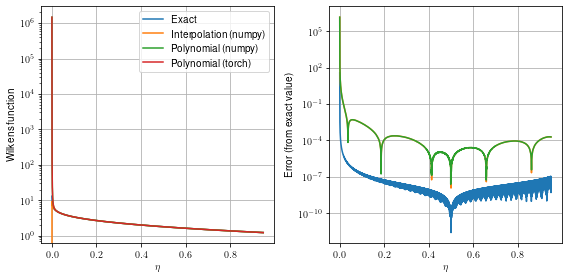

In [79]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.semilogy(eta, exact_np, '-', label='Exact')
ax.semilogy(eta, interp_np, '-', label='Interpolation (numpy)')
ax.semilogy(eta, poly_np, '-', label='Polynomial (numpy)')
ax.semilogy(eta, poly_torch.numpy(), '-', label='Polynomial (torch)')

ax2.semilogy(eta, np.abs(exact_np - interp_np), '-', label='Interpolation (numpy)')
ax2.semilogy(eta, np.abs( exact_np - poly_np), '-', label='Polynomial (numpy)')
ax2.semilogy(eta, np.abs(exact_np - poly_torch.numpy()), '-', label='Polynomial (torch)')


ax2.set_xlabel('$\\eta$')
ax.set_xlabel('$\\eta$')
ax.set_ylabel('Wilkens function')
ax2.set_ylabel('Error (from exact value)')
ax.grid()
ax.legend()
ax2.grid()
fig.tight_layout()